In [1]:
import corrfit
import sys
import h5py
import gvar as gv
import numpy as np

import sys
sys.path.insert(0, '../')
import hvp

In [2]:
jackknife = True
ensemble = 'E250'
gevp_key = 'pSq0-T1up'
datatag = gevp_key+'_prcpl'
off_diagonal_key = 'pSq0-T1up-CURRENT'
particles = [gevp_key]
bin_size = 1

# load data

In [3]:
input_output = hvp.InputOutput()

data = input_output.load_data(ensemble=ensemble, particles=gevp_key)
print('~~~ "data" looks like:')
for k in data:
    print(k, ':', data[k].shape)

~~~ "data" looks like:
('pSq0-T1up', (0, 0)) : (505, 41)
('pSq0-T1up', (0, 1)) : (505, 41)
('pSq0-T1up', (0, 2)) : (505, 41)
('pSq0-T1up', (0, 3)) : (505, 41)
('pSq0-T1up', (0, 4)) : (505, 41)
('pSq0-T1up', (0, 5)) : (505, 41)
('pSq0-T1up', (0, 6)) : (505, 41)
('pSq0-T1up', (0, 7)) : (505, 41)
('pSq0-T1up', (0, 8)) : (505, 41)
('pSq0-T1up', (1, 0)) : (505, 41)
('pSq0-T1up', (1, 1)) : (505, 41)
('pSq0-T1up', (1, 2)) : (505, 41)
('pSq0-T1up', (1, 3)) : (505, 41)
('pSq0-T1up', (1, 4)) : (505, 41)
('pSq0-T1up', (1, 5)) : (505, 41)
('pSq0-T1up', (1, 6)) : (505, 41)
('pSq0-T1up', (1, 7)) : (505, 41)
('pSq0-T1up', (1, 8)) : (505, 41)
('pSq0-T1up', (2, 0)) : (505, 41)
('pSq0-T1up', (2, 1)) : (505, 41)
('pSq0-T1up', (2, 2)) : (505, 41)
('pSq0-T1up', (2, 3)) : (505, 41)
('pSq0-T1up', (2, 4)) : (505, 41)
('pSq0-T1up', (2, 5)) : (505, 41)
('pSq0-T1up', (2, 6)) : (505, 41)
('pSq0-T1up', (2, 7)) : (505, 41)
('pSq0-T1up', (2, 8)) : (505, 41)
('pSq0-T1up', (3, 0)) : (505, 41)
('pSq0-T1up', (3, 1)) : (

In [4]:
rw_factors = input_output._get_rw_factors(ensemble=ensemble)
gevp_args = input_output.get_gevp_args(ensemble=ensemble, datatag=datatag)
print(gevp_args)

{'t0': 5}


In [5]:
# form correlators
gevp = corrfit.two_pt.GEVP(raw_correlators=data, gevp_key=gevp_key, 
    rw_factors=rw_factors, jackknife=jackknife, seed=ensemble, bin_size=bin_size)

correlators = corrfit.io.to_gvar(
    gevp.get_principal_correlators(t0=gevp_args['t0']), jackknife=True, preprocessed=True, decorrelate_keys=True)

print('~~~ "correlators" looks like:')
for k in correlators:
    print(k, ':', correlators[k].shape)


Jackknifing: 100%|██████████| 506/506 [00:08<00:00, 56.58it/s]

~~~ "correlators" looks like:
('pSq0-T1up_prcpl', 0) : (41,)
('pSq0-T1up_prcpl', 1) : (41,)
('pSq0-T1up_prcpl', 2) : (41,)
('pSq0-T1up_prcpl', 3) : (41,)
('pSq0-T1up_prcpl', 4) : (41,)
('pSq0-T1up_prcpl', 5) : (41,)
('pSq0-T1up_prcpl', 6) : (41,)
('pSq0-T1up_prcpl', 7) : (41,)
('pSq0-T1up_prcpl', 8) : (41,)


# fit

$\lambda_n(t) = e^{-E_n(t-t_0)} [1 + ...]$

In [6]:
prior = input_output.get_prior(ensemble=ensemble, datatags=datatag)
fargs_unfmt = input_output.get_fit_args(ensemble=ensemble, datatags=datatag)
fargs_unfmt[datatag]['default']['t0_offset'] = gevp_args['t0']

fit_manager = corrfit.two_pt.FitManager(
    correlators=correlators, fargs_unfmt=fargs_unfmt, prior=prior)

print(fit_manager)

~~~~~~~~~~~~~~~ FIT SETTINGS ~~~~~~~~~~~~~~~
('pSq0-T1up_prcpl', 'default')
	n_states              : 2
	t_start               : 6
	t_end                 : 21
	particle_statistics   : fermi-dirac
	overlap               : ZZ
	prior_En              : False
	svdcut                : None
	t0_offset             : 5
	use_log_dE            : False
	fold_data             : False
	energy_gaps           : constant
	t_period              : None
	perform_fit           : True
	uncorrelated          : False

('pSq0-T1up_prcpl', '0')
	(default)            

('pSq0-T1up_prcpl', '1')
	(default)            

('pSq0-T1up_prcpl', '2')
	(default)            

('pSq0-T1up_prcpl', '3')
	(default)            

('pSq0-T1up_prcpl', '4')
	(default)            

('pSq0-T1up_prcpl', '5')
	t_end                 : 16

('pSq0-T1up_prcpl', '6')
	(default)            

('pSq0-T1up_prcpl', '7')
	t_end                 : 15

('pSq0-T1up_prcpl', '8')
	t_end                 : 13


~~~~~~~~~~~~~~~ FIT RESULTS ~~~~~~~~~~~~~~~


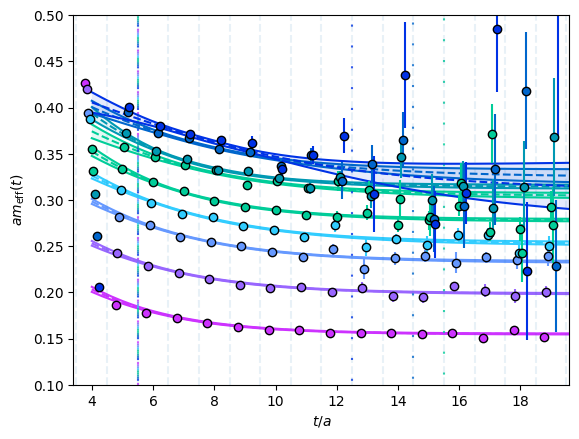

In [7]:
fig = fit_manager.plot_effective_mass(t_plot_min=4, t_plot_max=20, ylim=(0.1, 0.5), show_legend=False)
#input_output.save_fig(fig, filetype='pdf')
fig

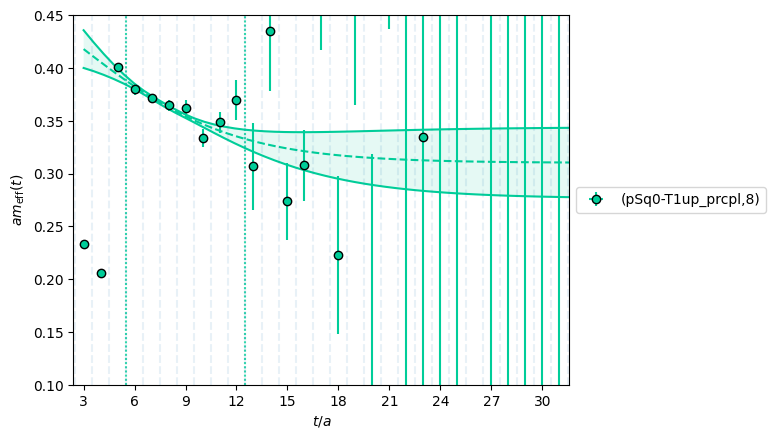

In [8]:
src_snk = 8
fit_manager.plot_effective_mass(src_snk=src_snk, t_plot_min=3, t_plot_max=32)

In [9]:
# fit_manager.plot_stability(src_snk=src_snk, n_states=2, t_start=range(6, 17), 
#     show_all=True, show_avg=True, show_legend=True)

In [10]:
# compute model average

#fit = fit_manager.get_fits()
#model_avg_params = dict(t_start=range(4, 10))
model_avg_params = input_output.get_model_avg_args(datatag=gevp_key+'_prcpl', ensemble=ensemble)

temp = fit_manager.average_parameters(params='E*', **model_avg_params)

posterior_energies = fit_manager.average_parameters(params='E*', **model_avg_params)
for k, v in posterior_energies.items():
    print(k, v)

E0::pSq0-T1up_prcpl::0 0.15471(41)
E0::pSq0-T1up_prcpl::1 0.19879(61)
E0::pSq0-T1up_prcpl::2 0.23336(83)
E0::pSq0-T1up_prcpl::3 0.2524(15)
E0::pSq0-T1up_prcpl::4 0.2775(13)
E0::pSq0-T1up_prcpl::5 0.3043(14)
E0::pSq0-T1up_prcpl::6 0.3136(10)
E0::pSq0-T1up_prcpl::7 0.3334(35)
E0::pSq0-T1up_prcpl::8 0.3203(98)


# Compare

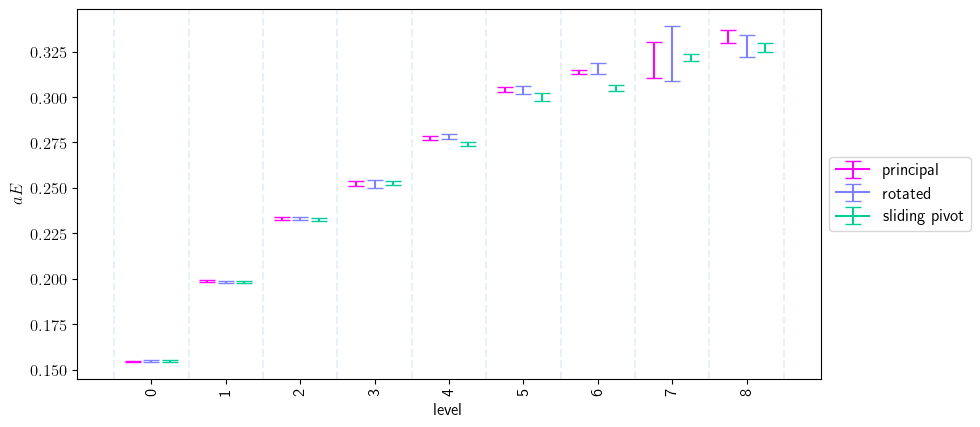

In [11]:
import corrfit
import gvar as gv
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 12
})

import sys
sys.path.insert(0, '../')
import hvp

input_output = hvp.InputOutput()

table = {}

table['principal'] = {}
table['principal'][0] = gv.gvar('0.15471(41)')
table['principal'][1] = gv.gvar('0.19879(61)')
table['principal'][2] = gv.gvar('0.23336(83)')
table['principal'][3] = gv.gvar('0.2524(15)')
table['principal'][4] = gv.gvar('0.2775(13)')
table['principal'][5] = gv.gvar('0.3043(14)')
table['principal'][6] = gv.gvar('0.3136(10)')
table['principal'][7] = gv.gvar('0.3203(98)')
table['principal'][8] = gv.gvar('0.3334(35)')


table['rotated'] = {}
table['rotated'][0] = gv.gvar('0.15489(58)')
table['rotated'][1] = gv.gvar('0.19842(66)')
table['rotated'][2] = gv.gvar('0.2332(10)')
table['rotated'][3] = gv.gvar('0.2522(21)')
table['rotated'][4] = gv.gvar('0.2781(14)')
table['rotated'][5] = gv.gvar('0.3040(23)')
table['rotated'][6] = gv.gvar('0.3155(31)')
table['rotated'][7] = gv.gvar('0.324(15)')
table['rotated'][8] = gv.gvar('0.3281(59)')


table['sliding pivot'] = {}
table['sliding pivot'][0] = gv.gvar('0.15498(43)')
table['sliding pivot'][1] = gv.gvar('0.19846(51)')
table['sliding pivot'][2] = gv.gvar('0.23263(69)')
table['sliding pivot'][3] = gv.gvar('0.25270(98)')
table['sliding pivot'][4] = gv.gvar('0.2741(11)')
table['sliding pivot'][5] = gv.gvar('0.3000(20)')
table['sliding pivot'][6] = gv.gvar('0.3050(15)')
table['sliding pivot'][7] = gv.gvar('0.3217(19)')
table['sliding pivot'][8] = gv.gvar('0.3272(23)')
#table['sliding']['N'] = gv.gvar('0.532(11)')

fig = corrfit.plot.plot_table(table, xlabel='level', ylabel='$aE$')
input_output.save_fig(fig, filetype='pdf')
fig